In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
#uploaded = files.upload()

In [ ]:
#df = pd.read_csv('CO2, data-new.csv')

In [ ]:
file_id = "1ANm7zCJh4jGhuV7cKuVUhXFjVxsc1Z_u"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)

In [ ]:
df.head()

,Country Name,Country Code,Time,Time Code,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5],"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]",Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],Energy intensity level of primary energy (MJ/$2021 PPP GDP) [EG.EGY.PRIM.PP.KD],Urban population (% of total population) [SP.URB.TOTL.IN.ZS],Trade (% of GDP) [NE.TRD.GNFS.ZS]
0,Afghanistan,AFG,2018.0,YR2018,"0,3214187046","2432,276701","18,3","2,4","24,99916452",NaN
1,Afghanistan,AFG,2019.0,YR2019,"0,3197527819","2583,485332","18,9","2,37","25,14372588",NaN
2,Afghanistan,AFG,2020.0,YR2020,"0,3108246059","2561,981761","18,2","2,54","25,26221034","46,70989455"
3,Afghanistan,AFG,2021.0,YR2021,"0,3121567848","2144,16657",20,"2,94","25,34786203","51,41171637"
4,Afghanistan,AFG,2022.0,YR2022,"0,2784209564","2122,995815",20,NaN,"25,39392506","72,88546961"


In [ ]:
df = df.rename(columns={
    'Country Name': 'Country_Name',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]': 'CO2_emissions',
    'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]': 'GDP_per_capita',
    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]': 'REC(%)',
    'Energy intensity level of primary energy (MJ/$2021 PPP GDP) [EG.EGY.PRIM.PP.KD]': 'Energy_intensity',
    'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]': 'Urban_population(%)',
    'Trade (% of GDP) [NE.TRD.GNFS.ZS]': 'Trade(%)'
})
print(df.head())

  Country_Name Country Code    Time Time Code CO2_emissions GDP_per_capita  \
0  Afghanistan          AFG  2018.0    YR2018  0,3214187046    2432,276701   
1  Afghanistan          AFG  2019.0    YR2019  0,3197527819    2583,485332   
2  Afghanistan          AFG  2020.0    YR2020  0,3108246059    2561,981761   
3  Afghanistan          AFG  2021.0    YR2021  0,3121567848     2144,16657   
4  Afghanistan          AFG  2022.0    YR2022  0,2784209564    2122,995815   

  REC(%) Energy_intensity Urban_population(%)     Trade(%)  
0   18,3              2,4         24,99916452          NaN  
1   18,9             2,37         25,14372588          NaN  
2   18,2             2,54         25,26221034  46,70989455  
3     20             2,94         25,34786203  51,41171637  
4     20              NaN         25,39392506  72,88546961  


In [ ]:
cols = ['CO2_emissions', 'GDP_per_capita', 'REC(%)', 'Energy_intensity', 'Urban_population(%)', 'Trade(%)']

for col in cols:
    # 1. Դարձնում ենք ստրինգ
    df[col] = df[col].astype(str)

    # 2. Հեռացնում ենք բոլոր ավելորդ սիմվոլները, բացի թվից և ստորակետից/կետից
    # Եթե կան ".." կամ այլ նշաններ, դրանք կփոխվեն դատարկ տեքստի
    df[col] = df[col].str.replace(r'[^0-9,.]', '', regex=True)

    # 3. Փոխարինում ենք ստորակետը կետով
    df[col] = df[col].str.replace(',', '.')

    # 4. Հեռացնում ենք ".." նշանը կամ դատարկ տողերը դարձնում NaN
    df[col] = df[col].replace(['', '..', 'nan'], np.nan)

    # 5. Փոխակերպում ենք թվի (float)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Այժմ միջինացումը կաշխատի ճիշտ թվերով
df_averaged = df.groupby('Country_Name')[cols].mean().reset_index()

print(df_averaged.head())

     Country_Name  CO2_emissions  GDP_per_capita  REC(%)  Energy_intensity  \
0     Afghanistan       0.300936     2341.104848   19.08            2.5625   
1         Albania       1.889404    19835.971146   41.05            2.3300   
2         Algeria       4.076191    15010.623321    0.15            5.4200   
3  American Samoa       0.002044             NaN    0.38               NaN   
4         Andorra            NaN    62755.426890   18.56            1.9840   

   Urban_population(%)    Trade(%)  
0            25.331525   59.647936  
1            57.487258   76.098926  
2            73.607632   45.890613  
3            82.211522  148.850594  
4            88.680119         NaN  


In [ ]:
df_averaged.head()

,Country_Name,CO2_emissions,GDP_per_capita,REC(%),Energy_intensity,Urban_population(%),Trade(%)
0,Afghanistan,0.300936,2341.104848,19.08,2.5625,25.331525,59.647936
1,Albania,1.889404,19835.971146,41.05,2.3300,57.487258,76.098926
2,Algeria,4.076191,15010.623321,0.15,5.4200,73.607632,45.890613
3,American Samoa,0.002044,NaN,0.38,NaN,82.211522,148.850594
4,Andorra,NaN,62755.426890,18.56,1.9840,88.680119,NaN


In [ ]:
cols_to_fix = ['CO2_emissions', 'GDP_per_capita', 'REC(%)', 'Energy_intensity', 'Urban_population(%)', 'Trade(%)']

for col in cols_to_fix:
    # 1. Հաշվում ենք մեդիանը
    median_val = df_averaged[col].median()

    # 2. Լրացնում ենք NaN-երը
    df_averaged[col] = df_averaged[col].fillna(median_val)

# Հիմա տեսնենք արդյունքը
print(df_averaged[['Country_Name', 'CO2_emissions']].head())

     Country_Name  CO2_emissions
0     Afghanistan       0.300936
1         Albania       1.889404
2         Algeria       4.076191
3  American Samoa       0.002044
4         Andorra       2.538527


In [ ]:
print(df_averaged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Name         217 non-null    object 
 1   CO2_emissions        217 non-null    float64
 2   GDP_per_capita       217 non-null    float64
 3   REC(%)               217 non-null    float64
 4   Energy_intensity     217 non-null    float64
 5   Urban_population(%)  217 non-null    float64
 6   Trade(%)             217 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.0+ KB
None


In [ ]:
print(df_averaged.isnull().sum())

Country_Name           0
CO2_emissions          0
GDP_per_capita         0
REC(%)                 0
Energy_intensity       0
Urban_population(%)    0
Trade(%)               0
dtype: int64


In [ ]:
# 1. Համոզվում ենք, որ GDP-ն թիվ է
df_averaged['GDP_per_capita'] = pd.to_numeric(df_averaged['GDP_per_capita'], errors='coerce')

# 2. Սահմանում ենք շեմը
my_threshold = 13935

# 3. Ստեղծում ենք Dummy-ն
df_averaged['Is_High_Income'] = (df_averaged['GDP_per_capita'] >= my_threshold).astype(int)

# 4. Նորից ստուգում ենք արդյունքը
print(df_averaged['Is_High_Income'].value_counts())

Is_High_Income
1    134
0     83
Name: count, dtype: int64


In [ ]:
# 1. Սահմանում ենք հանածո վառելիք արտահանող հիմնական երկրների ցանկը
# Այս ցանկը կարող ես համալրել ըստ քո հետազոտության (օրինակ՝ OPEC+ երկրները)
fossil_fuel_exporters = [
    'Algeria', 'Congo, Rep.', 'Equatorial Guinea', 'Gabon', 'Iran, Islamic Rep.',
    'Iraq', 'Kuwait', 'Libya', 'Nigeria',
    'Saudi Arabia', 'United Arab Emirates', 'Venezuela, RB', 'Russian Federation', 'Kazakhstan', 'Qatar', 'Turkmenistan'
]

# 2. Ավելացնում ենք dummy փոփոխականը
# 1, եթե երկիրը ցուցակում է, 0՝ եթե ոչ
df_averaged['is_fossil_fuel_exporter'] = np.where(
    df_averaged['Country_Name'].isin(fossil_fuel_exporters), 1, 0
)

# Ստուգենք արդյունքը մի քանի երկրների համար
print(df_averaged[['Country_Name', 'is_fossil_fuel_exporter']].head(20))


           Country_Name  is_fossil_fuel_exporter
0           Afghanistan                        0
1               Albania                        0
2               Algeria                        1
3        American Samoa                        0
4               Andorra                        0
5                Angola                        0
6   Antigua and Barbuda                        0
7             Argentina                        0
8               Armenia                        0
9                 Aruba                        0
10            Australia                        0
11              Austria                        0
12           Azerbaijan                        0
13         Bahamas, The                        0
14              Bahrain                        0
15           Bangladesh                        0
16             Barbados                        0
17              Belarus                        0
18              Belgium                        0
19               Bel

In [ ]:
print(df_averaged['is_fossil_fuel_exporter'].value_counts())

# Տեսնել այն երկրները, որոնք դարձան 1
print(df_averaged[df_averaged['is_fossil_fuel_exporter'] == 1]['Country_Name'].unique())

is_fossil_fuel_exporter
0    201
1     16
Name: count, dtype: int64
['Algeria' 'Congo, Rep.' 'Equatorial Guinea' 'Gabon' 'Iran, Islamic Rep.'
 'Iraq' 'Kazakhstan' 'Kuwait' 'Libya' 'Nigeria' 'Qatar'
 'Russian Federation' 'Saudi Arabia' 'Turkmenistan' 'United Arab Emirates'
 'Venezuela, RB']


In [ ]:
cols_to_log = ['CO2_emissions', 'GDP_per_capita', 'Energy_intensity']

for col in cols_to_log:
    # Ստեղծում ենք նոր սյունակ 'log_' նախդիրով
    # np.log1p(x) հաշվում է log(1 + x), ինչը ապահով է 0-ների դեպքում
    df_averaged[f'log_{col}'] = np.log1p(df_averaged[col])

# Ստուգենք նոր սյուները
print(df_averaged[['Country_Name', 'CO2_emissions', 'log_CO2_emissions']].head())

     Country_Name  CO2_emissions  log_CO2_emissions
0     Afghanistan       0.300936           0.263084
1         Albania       1.889404           1.061050
2         Algeria       4.076191           1.624561
3  American Samoa       0.002044           0.002042
4         Andorra       2.538527           1.263711


In [ ]:
df_averaged.head()

,Country_Name,CO2_emissions,GDP_per_capita,REC(%),Energy_intensity,Urban_population(%),Trade(%),Is_High_Income,is_fossil_fuel_exporter,log_CO2_emissions,log_GDP_per_capita,log_Energy_intensity
0,Afghanistan,0.300936,2341.104848,19.08,2.5625,25.331525,59.647936,0,0,0.263084,7.758805,1.270463
1,Albania,1.889404,19835.971146,41.05,2.3300,57.487258,76.098926,1,0,1.061050,9.895303,1.202972
2,Algeria,4.076191,15010.623321,0.15,5.4200,73.607632,45.890613,1,1,1.624561,9.616580,1.859418
3,American Samoa,0.002044,17361.711057,0.38,4.0160,82.211522,148.850594,1,0,0.002042,9.762080,1.612633
4,Andorra,2.538527,62755.426890,18.56,1.9840,88.680119,80.705852,1,0,1.263711,11.047016,1.093265


In [ ]:
print(df_averaged.shape)

(217, 12)


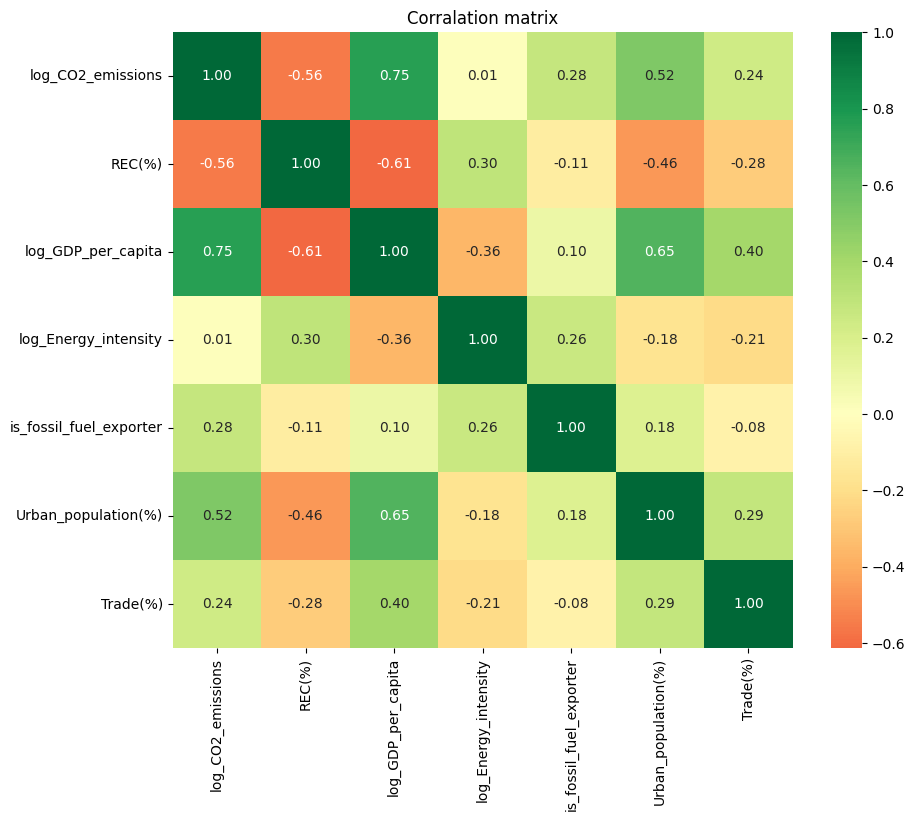

In [ ]:
# Ընտրում ենք հիմնական սյուները,
cols_for_corr = ['log_CO2_emissions',
                 'REC(%)',
                 'log_GDP_per_capita',
                 'log_Energy_intensity',
                 'is_fossil_fuel_exporter',
                 'Urban_population(%)',
                 'Trade(%)']

# Հաշվում ենք կոռելյացիան (Pearson correlation)
corr_matrix = df_averaged[cols_for_corr].corr()

# Ջերմային քարտեզի (Heatmap) կառուցում
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
plt.title('Corralation matrix')
plt.show()

In [ ]:
# 1. Ստեղծում ենք ինդիկատոր՝ CO2 / GDP
# Քանի որ մենք օգտագործում ենք իրական թվերը (ոչ թե լոգարիթմը), կտեսնենք իրական արդյունավետությունը
df_averaged['CO2_per_GDP'] = df_averaged['CO2_emissions'] / df_averaged['GDP_per_capita']

# 2. Ֆիլտրում ենք միայն այն երկրները, որոնք ունեն միջինից բարձր ՀՆԱ
# Սա կարևոր է, որպեսզի ցանկում չհայտնվեն շատ աղքատ երկրներ, որոնք պարզապես արդյունաբերություն չունեն
gdp_threshold = df_averaged['GDP_per_capita'].median()
high_gdp_countries = df_averaged[df_averaged['GDP_per_capita'] > gdp_threshold]

# 3. Գտնում ենք թոփ 10 ամենաարդյունավետ երկրները (ամենացածր CO2_per_GDP)
top_efficient = high_gdp_countries.sort_values('CO2_per_GDP').head(10)

print("The most efficient countries (high GDP, low CO₂ emissions):")
print(top_efficient[['Country_Name', 'GDP_per_capita', 'CO2_emissions', 'CO2_per_GDP']])

The most efficient countries (high GDP, low CO₂ emissions):
                  Country_Name  GDP_per_capita  CO2_emissions   CO2_per_GDP
212      Virgin Islands (U.S.)    43040.785330       0.001891  4.392695e-08
65               Faroe Islands    69729.083799       0.039576  5.675631e-07
118           Macao SAR, China    99060.227050       2.900991  2.928512e-05
165                 San Marino    64423.943223       2.538527  3.940347e-05
4                      Andorra    62755.426890       2.538527  4.045112e-05
21                     Bermuda    99742.291873       4.092796  4.103371e-05
188                Switzerland    82051.545759       4.135231  5.039797e-05
173  Sint Maarten (Dutch part)    45856.206211       2.538527  5.535842e-05
124                      Malta    57136.842460       3.234078  5.660233e-05
187                     Sweden    62150.682009       3.707578  5.965466e-05


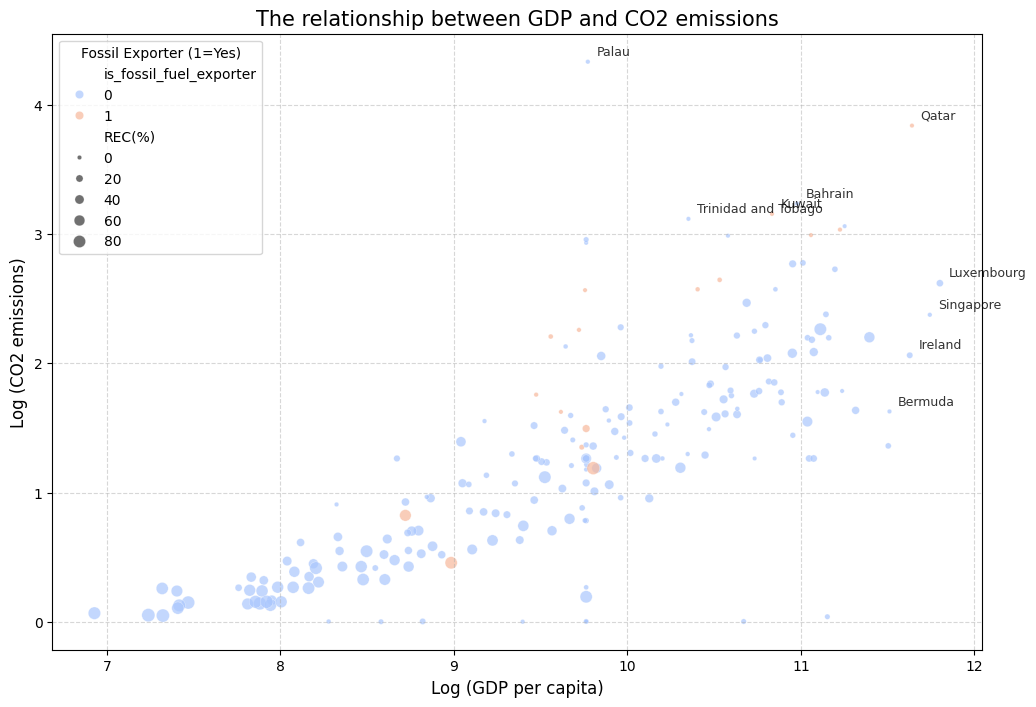

In [ ]:
plt.figure(figsize=(12, 8))

# Ստեղծում ենք Scatter Plot
scatter = sns.scatterplot(
    data=df_averaged,
    x='log_GDP_per_capita',
    y='log_CO2_emissions',
    hue='is_fossil_fuel_exporter', # Գույնը՝ ըստ արտահանող լինելու
    size='REC(%)',                    # Կետի չափսը՝ ըստ վերականգնվող էներգիայի տոկոսի
    sizes=(10, 90),               # Կետերի նվազագույն և առավելագույն չափսերը
    palette='coolwarm',
    alpha=0.7
)

# Ավելացնենք անուններ մի քանի հետաքրքիր երկրների համար
# Օրինակ՝ Աղյուսակից հանում է այն 5 տողերը, որոնք ունեն ամենաբարձր ՀՆԱ-ն և ամենաբարձր $CO_2$ արտանետումները։
top_countries = df_averaged.nlargest(5, 'GDP_per_capita')['Country_Name'].tolist()
top_polluters = df_averaged.nlargest(5, 'CO2_emissions')['Country_Name'].tolist()

#ցիկլը անցնում է df_averaged աղյուսակի բոլոր տողերով մեկ առ մեկ, հարցնելով տվյալ տողի երկիրը
#պատկանո՞ւմ է այն top_countries,top_polluters ցուցակներին, եթե այո ապա հրում է կետից վերև և աջ, որպեսզի անունը չնստի հենց կետի վրա և լինի ընթեռնելի:

for i in range(df_averaged.shape[0]):
    country = df_averaged.iloc[i]['Country_Name']
    if country in top_countries or country in top_polluters:
        plt.text(
            df_averaged.iloc[i]['log_GDP_per_capita'] + 0.05,
            df_averaged.iloc[i]['log_CO2_emissions'] + 0.05,
            country, fontsize=9, alpha=0.8
        )

# Ձևավորում
plt.title('The relationship between GDP and CO2 emissions' , fontsize=15)
plt.xlabel('Log (GDP per capita)', fontsize=12)
plt.ylabel('Log (CO2 emissions)', fontsize=12)
plt.legend(title='Fossil Exporter (1=Yes)', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Regressions

In [ ]:
formula = (
    'Q("CO2_emissions") ~ '
    'Q("GDP_per_capita") + '
    'Q("REC(%)") + '
    'Q("Energy_intensity") + '
    'Q("Urban_population(%)") + '
    'Q("Trade(%)") + '
    'Q("Is_High_Income") + '
    'Q("is_fossil_fuel_exporter")'
)

model = smf.ols(formula=formula, data=df_averaged)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("CO2_emissions")   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     23.22
Date:                Thu, 25 Dec 2025   Prob (F-statistic):           3.51e-23
Time:                        09:16:41   Log-Likelihood:                -675.56
No. Observations:                 217   AIC:                             1367.
Df Residuals:                     209   BIC:                             1394.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
formula = (
    'Q("log_CO2_emissions") ~ '
    'Q("log_GDP_per_capita") + '
    'Q("REC(%)") + '
    'Q("log_Energy_intensity") + '
    'Q("Urban_population(%)") + '
    'Q("Trade(%)") + '
    'Q("Is_High_Income") + '
    'Q("is_fossil_fuel_exporter")'
)

model = smf.ols(formula=formula, data=df_averaged)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("log_CO2_emissions")   R-squared:                       0.698
Model:                                OLS   Adj. R-squared:                  0.688
Method:                     Least Squares   F-statistic:                     69.01
Date:                    Thu, 25 Dec 2025   Prob (F-statistic):           6.58e-51
Time:                            09:16:41   Log-Likelihood:                -141.02
No. Observations:                     217   AIC:                             298.0
Df Residuals:                         209   BIC:                             325.1
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
formula = (
    'Q("log_CO2_emissions") ~ '
    'Q("log_GDP_per_capita") + '
    'Q("REC(%)") + '
    'Q("log_Energy_intensity") + '
    'Q("Urban_population(%)") + '
    'Q("Trade(%)") + '
    'Q("is_fossil_fuel_exporter")'
)

model = smf.ols(formula=formula, data=df_averaged)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("log_CO2_emissions")   R-squared:                       0.698
Model:                                OLS   Adj. R-squared:                  0.689
Method:                     Least Squares   F-statistic:                     80.88
Date:                    Thu, 25 Dec 2025   Prob (F-statistic):           7.07e-52
Time:                            09:16:41   Log-Likelihood:                -141.03
No. Observations:                     217   AIC:                             296.1
Df Residuals:                         210   BIC:                             319.7
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Hypothesis: The effect of GDP on CO₂ emissions

In [ ]:
model_pa = smf.ols('Q("log_CO2_emissions") ~ Q("log_GDP_per_capita")', data=df_averaged)
results_pa = model_pa.fit()
print(results_pa.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("log_CO2_emissions")   R-squared:                       0.570
Model:                                OLS   Adj. R-squared:                  0.568
Method:                     Least Squares   F-statistic:                     284.7
Date:                    Thu, 25 Dec 2025   Prob (F-statistic):           3.06e-41
Time:                            09:16:41   Log-Likelihood:                -179.44
No. Observations:                     217   AIC:                             362.9
Df Residuals:                         215   BIC:                             369.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

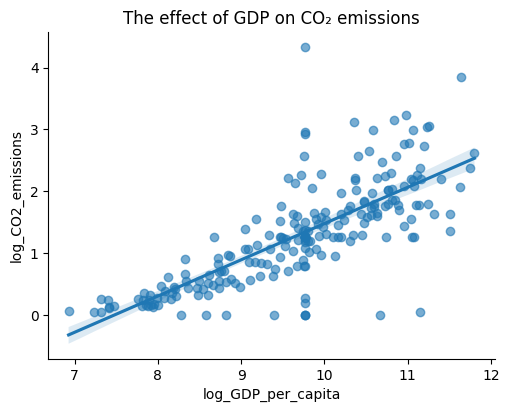

In [ ]:
sns.lmplot(
    data=df_averaged,
    x="log_GDP_per_capita",
    y="log_CO2_emissions",
    height=4,
    aspect=1.3,
    scatter_kws={"alpha": 0.6}
)
plt.title("The effect of GDP on CO₂ emissions")
plt.show()

Hypothesis: Is the average CO₂ emissions of fossil fuel exporters significantly different from that of non-exporters?

In [ ]:
# Առանձնացնում ենք երկու խմբերը
#երկրների լոգարիթմված արտանետումները, որոնք հանդիսանում են հանածո վառելիքի արտահանողներ և չարտահանողներ
exporters = df_averaged[df_averaged['is_fossil_fuel_exporter'] == 1]['log_CO2_emissions'].dropna()
non_exporters = df_averaged[df_averaged['is_fossil_fuel_exporter'] == 0]['log_CO2_emissions'].dropna()

print("Mean log_CO2_emissions (is_fossil_fuel_exporter):", exporters.mean())
print("Mean log_CO2_emissions (is_not_fossil_fuel_exporter): ", non_exporters.mean())
# Կատարում ենք T-test (Independent samples t-test)
t_stat, p_val = stats.ttest_ind(exporters, non_exporters, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

Mean log_CO2_emissions (is_fossil_fuel_exporter): 2.1234759414609323
Mean log_CO2_emissions (is_not_fossil_fuel_exporter):  1.217322892252179
T-statistic: 3.7803171198473695
P-value: 0.0015170878398826785


In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_averaged, x='log_CO2_emissions', hue='is_fossil_fuel_exporter', fill=True)
plt.title('The distribution of CO₂ emissions by country type')
plt.xlabel('log(CO2 Emissions)')
plt.ylabel('Density')
plt.show()